In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd "/content/drive/My Drive/Glitch"

/content/drive/My Drive/Glitch


In [3]:
!ls

Glitch_Classifier_GravitySpy.ipynb  test   trainingset_v1d1_metadata.csv
Glitch_Classifier_ResNet.ipynb	    train  validation


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
from keras.preprocessing import image

import matplotlib.image as mpimg
plt.rcParams.update({'figure.max_open_warning': 0})

In [5]:
train_dir = '/content/drive/My Drive/Glitch/train/train/'
validation_dir = '/content/drive/My Drive/Glitch/validation/validation/'
test_dir = '/content/drive/My Drive/Glitch/test/test/'

In [6]:
train_datagen = ImageDataGenerator(rescale=1. / 255)
validation_datagen = ImageDataGenerator(rescale=1. / 255)  
test_datagen = ImageDataGenerator(rescale=1. / 255)  

In [7]:
df = pd.read_csv("/content/drive/My Drive/Glitch/trainingset_v1d1_metadata.csv") 
df.label.value_counts()

Blip                   1821
Koi_Fish                706
Low_Frequency_Burst     621
Light_Modulation        512
Power_Line              449
Low_Frequency_Lines     447
Extremely_Loud          447
Scattered_Light         443
Violin_Mode             412
Scratchy                337
1080Lines               328
Whistle                 299
Helix                   279
Repeating_Blips         263
No_Glitch               150
Tomte                   103
None_of_the_Above        81
1400Ripples              81
Chirp                    60
Air_Compressor           58
Wandering_Line           42
Paired_Doves             27
Name: label, dtype: int64

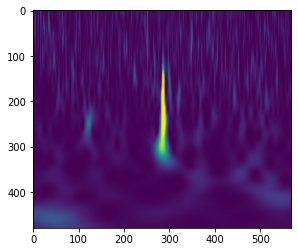

In [8]:
fullpath = train_dir + 'Blip/' + os.listdir(train_dir + 'Blip')[0]
img=mpimg.imread(fullpath)
plt.imshow(img)

In [9]:
classes_list = df.label.value_counts().index
classes_list = list(classes_list)


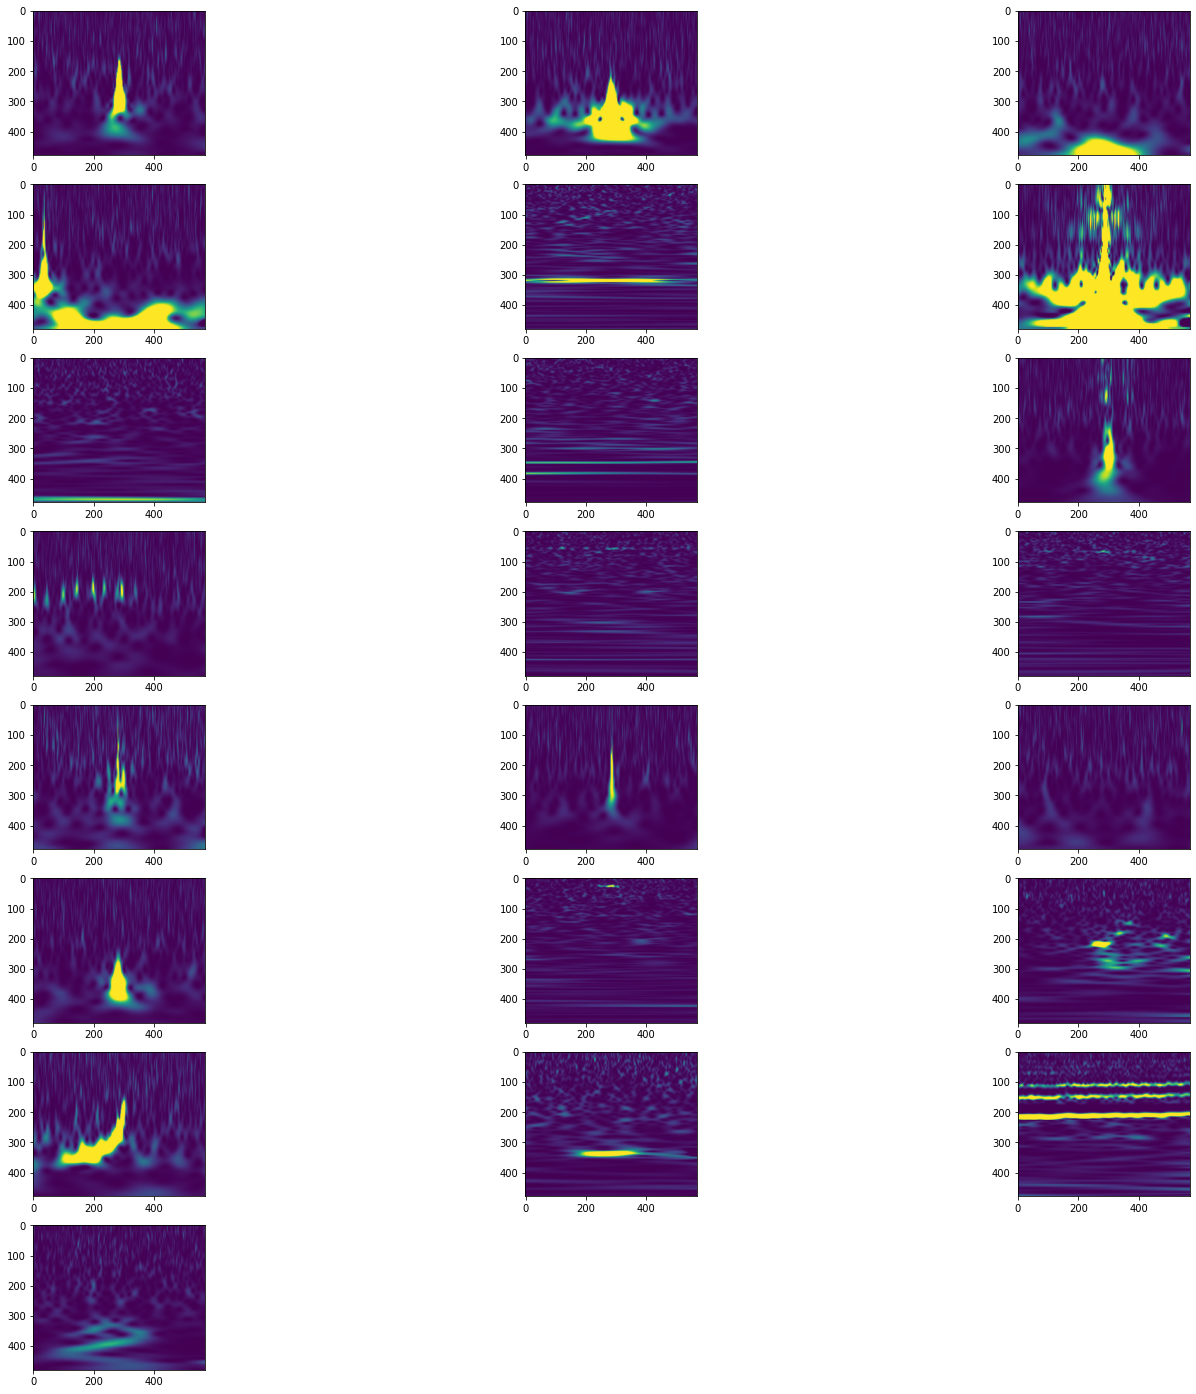

In [ ]:
plt.figure(figsize=(25, 25))
    
for i in range(0, 22):
    plt.subplot(8, 3, i+1)
    fullpath = train_dir + classes_list[i] + '/' + os.listdir(train_dir + classes_list[i])[0]
    img=mpimg.imread(fullpath)
    plt.imshow(img)

In [10]:
training_batch_size = 64
validation_batch_size = 32
img_dim = 224

train_generator = train_datagen.flow_from_directory(
  train_dir,                                                  
  classes = classes_list,
  target_size = (img_dim, img_dim),            
  batch_size = training_batch_size,
  class_mode = "categorical",
  shuffle = True,
  seed = 123)

Found 22348 images belonging to 22 classes.


In [11]:
validation_generator = validation_datagen.flow_from_directory(
  validation_dir,
  classes = classes_list,
  target_size = (img_dim, img_dim),
  batch_size = validation_batch_size,
  class_mode = "categorical",
  shuffle = True,
  seed = 123)

Found 4800 images belonging to 22 classes.


In [12]:
test_size = !find '/content/drive/My Drive/Glitch/test/test/' -type f | wc -l
test_size = int(test_size[0])
test_batch_size = 1

test_generator = test_datagen.flow_from_directory(
  test_dir,
  classes = classes_list,
  target_size = (img_dim, img_dim),
  batch_size = test_batch_size,
  class_mode = "categorical",
  shuffle = False)


Found 4720 images belonging to 22 classes.


In [20]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = Sequential()
model.add(ResNet50(weights='imagenet'))
model.add(tf.keras.layers.Dense(img_dim, activation="relu"))
#model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(22, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1000)              25636712  
_________________________________________________________________
dense_2 (Dense)              (None, 224)               224224    
_________________________________________________________________
dense_3 (Dense)              (None, 22)                4950      
Total params: 25,865,886
Trainable params: 25,812,766
Non-trainable params: 53,120
_________________________________________________________________


In [21]:
model.compile(loss = "categorical_crossentropy",  
              optimizer = 'adam', 
              metrics=["accuracy"])

In [22]:
training_step_size = 16
validation_step_size = 16

history = model.fit_generator(
  train_generator,
  steps_per_epoch = training_step_size,
  epochs = 10,
  validation_data = validation_generator,
  validation_steps = validation_step_size,
  verbose = 1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
16/16 [==============================] - 180s 11s/step - loss: 3.0527 - accuracy: 0.2598 - val_loss: 3.0202 - val_accuracy: 0.1074
Epoch 2/10
16/16 [==============================] - 160s 10s/step - loss: 2.9104 - accuracy: 0.3450 - val_loss: 2.9932 - val_accuracy: 0.0547
Epoch 3/10
16/16 [==============================] - 151s 10s/step - loss: 2.7460 - accuracy: 0.3333 - val_loss: 2.8045 - val_accuracy: 0.2383
Epoch 4/10
16/16 [==============================] - 140s 9s/step - loss: 2.5517 - accuracy: 0.3580 - val_loss: 2.8095 - val_accuracy: 0.2129
Epoch 5/10
16/16 [==============================] - 135s 9s/step - loss: 2.4364 - accuracy: 0.2965 - val_loss: 3.0448 - val_accuracy: 0.0371
Epoch 6/10
16/16 [==============================] - 123s 8s/step - loss: 2.2555 - accuracy: 0.2992 - val_loss: 2.8809 - val_accuracy: 0.1094
Epoch 7/10
16/16 [==============================] - 118s 7s/step - loss: 2.2184 - accuracy: 0.3069 - val_loss: 3.0931 - val_accuracy: 0.0742
Epoch 8/10

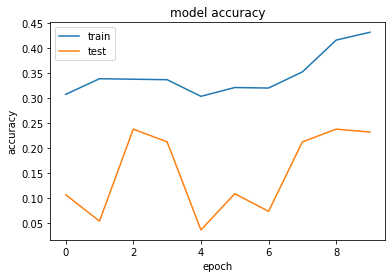

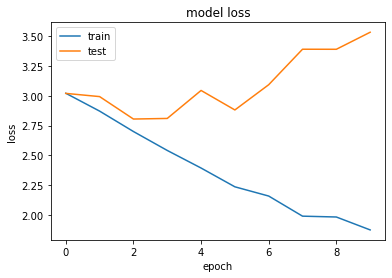

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
predictions = model.predict_generator(test_generator, steps = test_size, verbose = 1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


4720/4720 [==============================] - 638s 135ms/step


In [25]:
df = pd.DataFrame(predictions)
df['filename'] = test_generator.filenames
df['truth'] = ''
df['truth'] = df['filename'].str.split('/', 1, expand = True)
df['prediction_index'] = df[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].idxmax(axis=1)

df['prediction'] = ''

for i in range(0,22):
    df['prediction'][df['prediction_index'] == i] = classes_list[i]
    
cm = confusion_matrix(df['truth'], df['prediction'])

cm_df = pd.DataFrame(cm)

cm_df.columns = classes_list
cm_df['signal'] = classes_list

cm_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # 

,Blip,Koi_Fish,Low_Frequency_Burst,Light_Modulation,Power_Line,Low_Frequency_Lines,Extremely_Loud,Scattered_Light,Violin_Mode,Scratchy,1080Lines,Whistle,Helix,Repeating_Blips,No_Glitch,Tomte,None_of_the_Above,1400Ripples,Chirp,Air_Compressor,Wandering_Line,Paired_Doves,signal
0,0,0,0,200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Blip
1,0,0,0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Koi_Fish
2,0,0,0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Low_Frequency_Burst
3,0,0,0,1092,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Light_Modulation
4,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Power_Line
5,0,0,0,256,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Low_Frequency_Lines
6,0,0,0,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Extremely_Loud
7,0,0,0,408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Scattered_Light
8,0,0,0,312,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Violin_Mode
9,0,0,0,360,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Scratchy


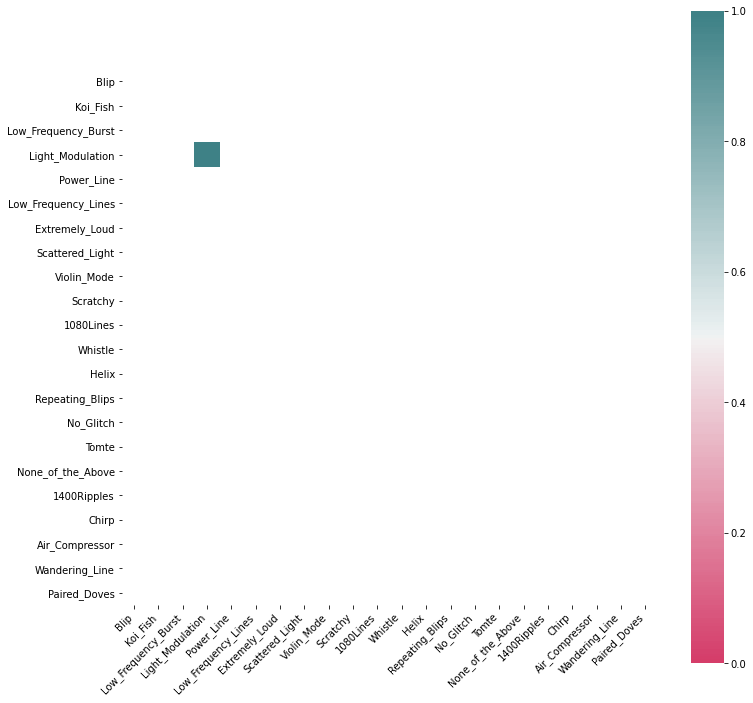

In [26]:
import seaborn as sns

plt.figure(figsize=(12, 12))

corr = cm_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=0, vmax=1, center=0.5,
    cmap=sns.diverging_palette(0, 200, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);